<a href="https://colab.research.google.com/github/CodeByHarri/Yield-Curve-Visualization/blob/main/Yield_Curve.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
import pandas as pd
import numpy as np
from tqdm import tqdm
from datetime import datetime
# Importing necessary libraries for plotting
import matplotlib.pyplot as plt
import calendar

In [13]:
df = pd.DataFrame()
for n in tdqm(range(29)):
  link = f'https://home.treasury.gov/resource-center/data-chart-center/interest-rates/TextView?type=daily_treasury_yield_curve&field_tdr_date_value=all&page={n}'
  t = pd.read_html(link)
  df = pd.concat([df,t[0]],axis=0)

In [57]:
yield_data = df.copy()
yield_data

,Date,20 YR,30 YR,Extrapolation Factor,8 WEEKS BANK DISCOUNT,COUPON EQUIVALENT,17 WEEKS BANK DISCOUNT,COUPON EQUIVALENT.1,52 WEEKS BANK DISCOUNT,COUPON EQUIVALENT.2,...,4 Mo,6 Mo,1 Yr,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,20 Yr,30 Yr
0,01/02/1990,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,7.89,7.81,7.87,7.90,7.87,7.98,7.94,NaN,8.00
1,01/03/1990,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,7.94,7.85,7.94,7.96,7.92,8.04,7.99,NaN,8.04
2,01/04/1990,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,7.90,7.82,7.92,7.93,7.91,8.02,7.98,NaN,8.04
3,01/05/1990,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,7.85,7.79,7.90,7.94,7.92,8.03,7.99,NaN,8.06
4,01/08/1990,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,7.88,7.81,7.90,7.95,7.92,8.05,8.02,NaN,8.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45,10/02/2023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.62,5.58,5.49,5.12,4.88,4.72,4.73,4.69,5.00,4.81
46,10/03/2023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.62,5.58,5.49,5.15,4.95,4.80,4.84,4.81,5.13,4.95
47,10/04/2023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.62,5.57,5.42,5.05,4.85,4.72,4.75,4.73,5.05,4.87
48,10/05/2023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.62,5.56,5.39,5.03,4.82,4.68,4.73,4.72,5.06,4.89


In [70]:
# Convert the 'Date' column to datetime format
yield_data['Date'] = pd.to_datetime(yield_data['Date'], format='%m/%d/%Y')

# Sort the dataframe by date
yield_data = yield_data.sort_values(by='Date', ascending=False)

# Filter the data to get the first entry of each month for the past 36 months
monthly_yield_data = yield_data.drop_duplicates(subset=['Date'], keep='first')

# Sort again to have the data in ascending order
monthly_yield_data = monthly_yield_data.sort_values(by='Date')

# Drop unnecessary columns and clean data
monthly_yield_data = monthly_yield_data.drop(columns=[ 'Extrapolation Factor',
                                                      '8 WEEKS BANK DISCOUNT', 'COUPON EQUIVALENT',
                                                      '17 WEEKS BANK DISCOUNT', 'COUPON EQUIVALENT.1',
                                                      '52 WEEKS BANK DISCOUNT', 'COUPON EQUIVALENT.2'])
# Filling NaN values with preceding values using forward fill method
monthly_yield_data.ffill(inplace=True)

# Dropping the empty columns
monthly_yield_data.drop(columns=['20 YR', '30 YR'], inplace=True)


# Extract year and month from the Date
monthly_yield_data['Year'] = monthly_yield_data['Date'].dt.year
monthly_yield_data['Month'] = monthly_yield_data['Date'].dt.month

# Get the first entry of each month
monthly_first_entry = monthly_yield_data.drop_duplicates(subset=['Year', 'Month'])

# Check the distribution of the data over years and months
monthly_first_entry.to_csv('yielddata.csv')


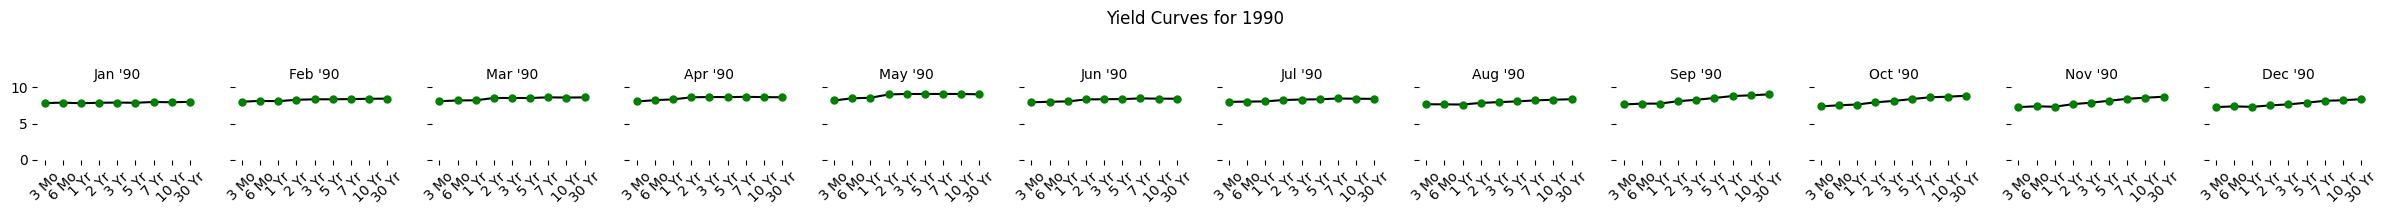

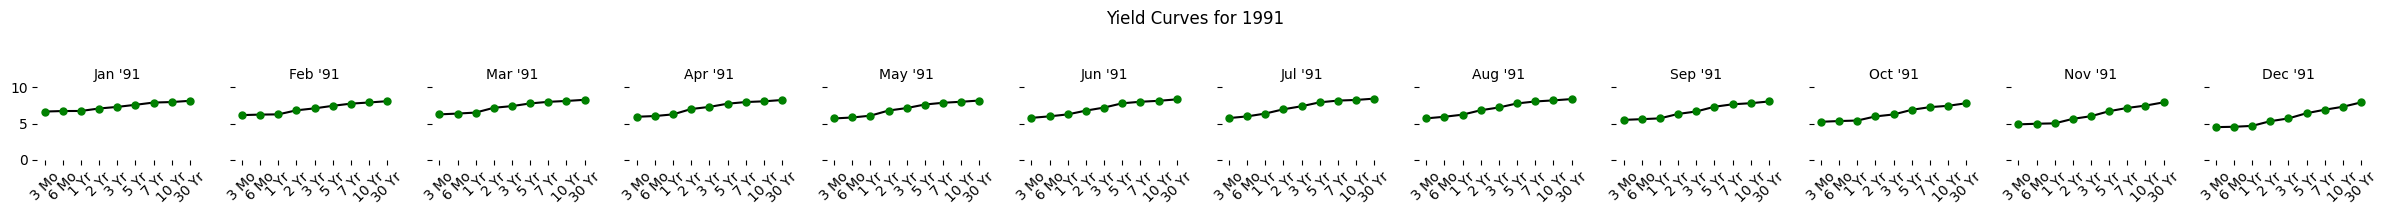

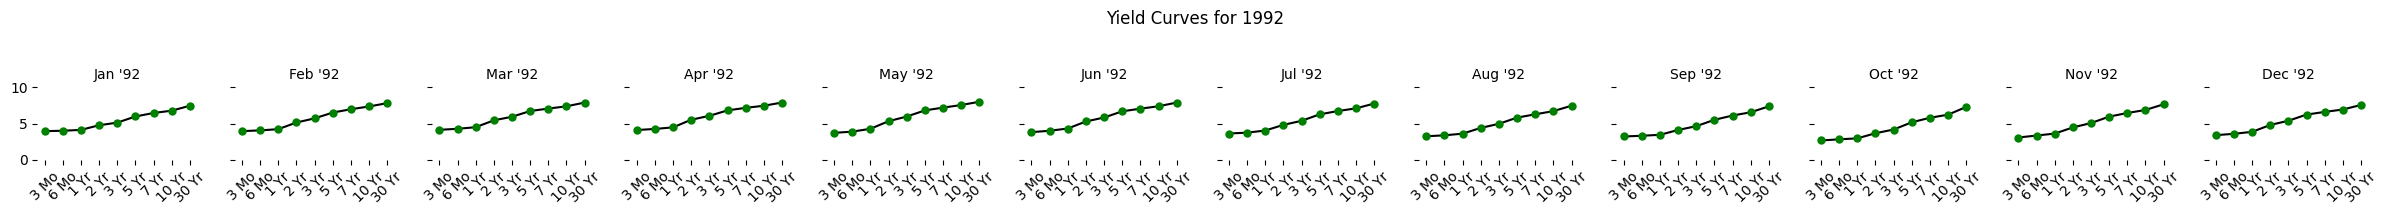

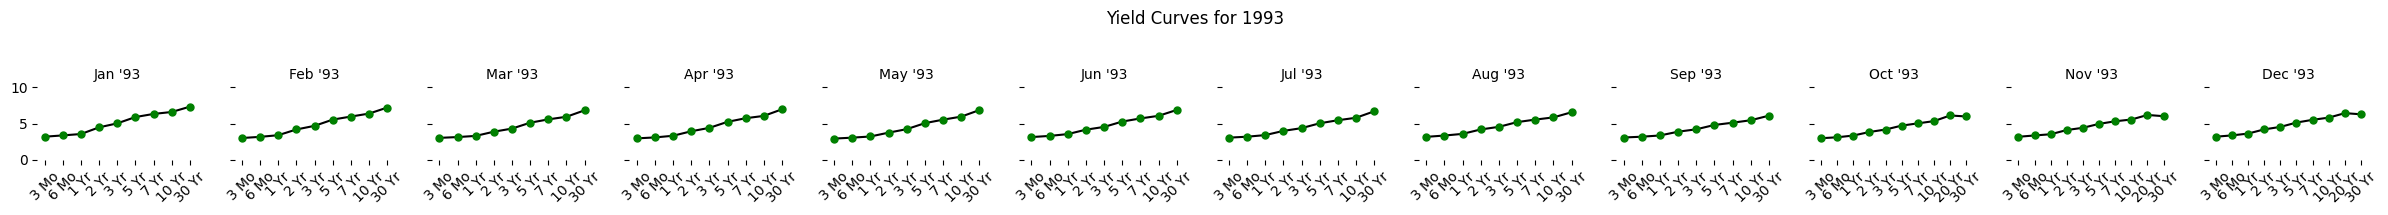

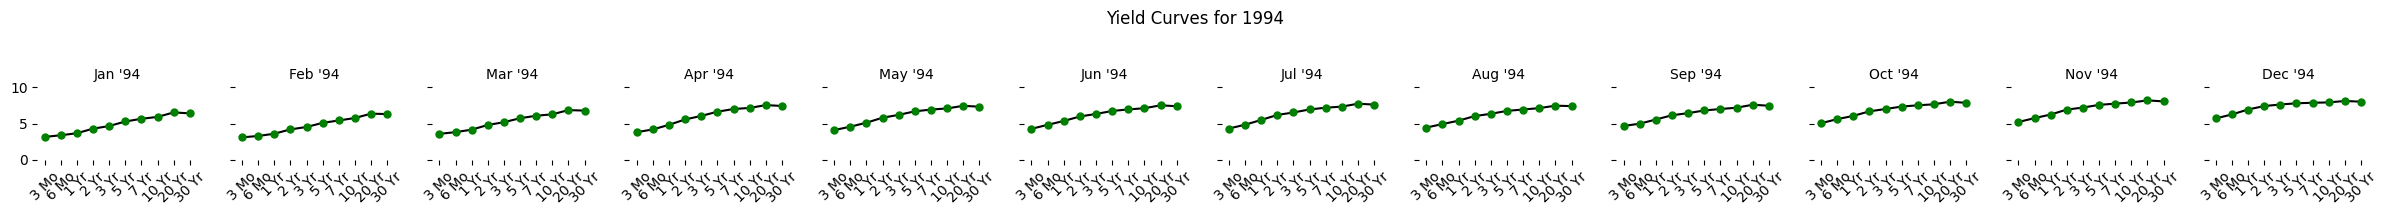

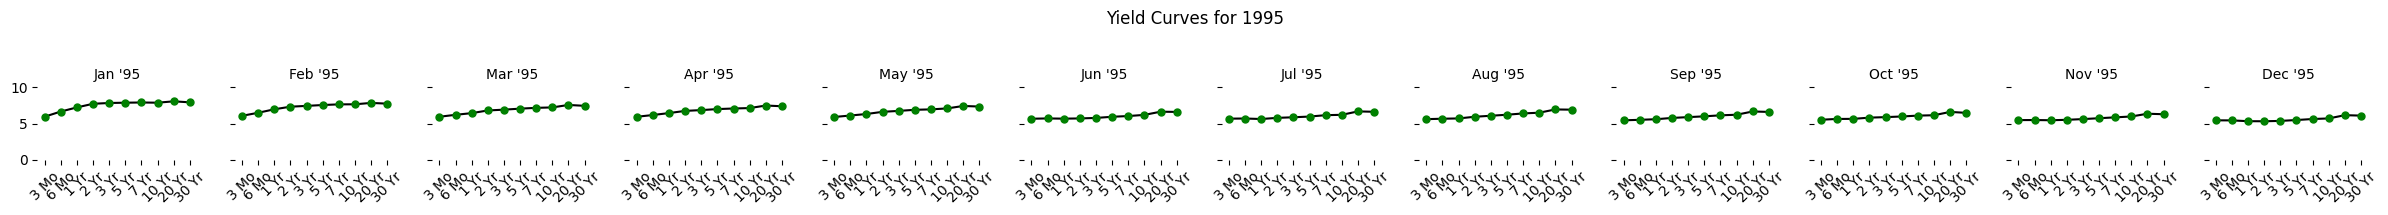

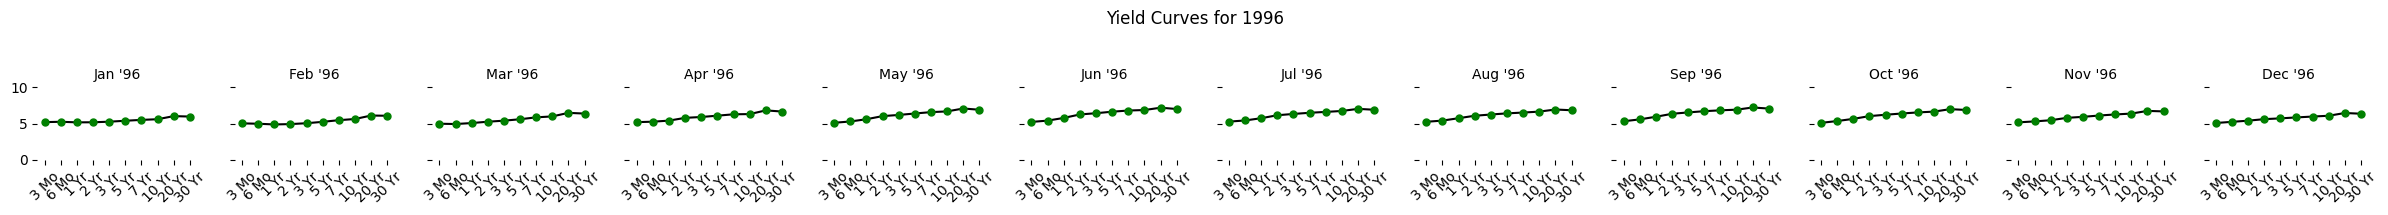

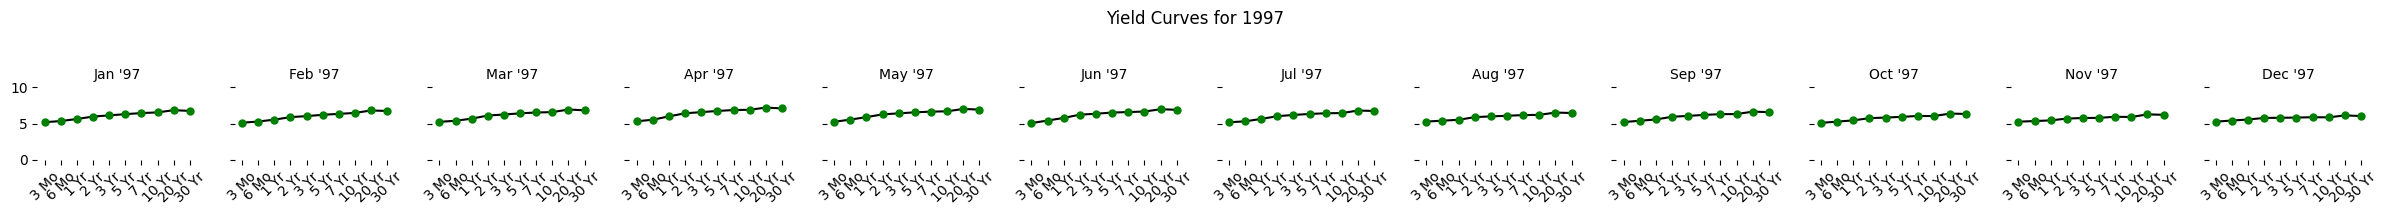

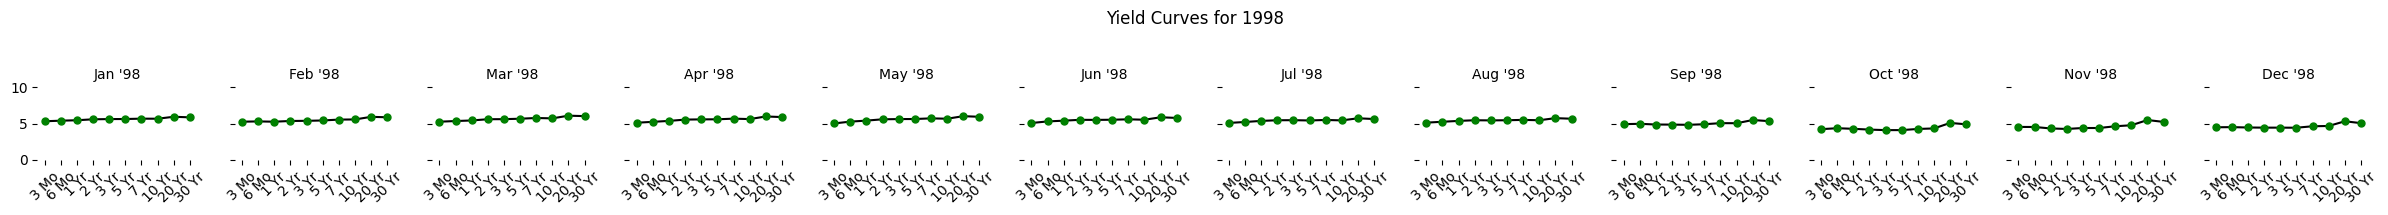

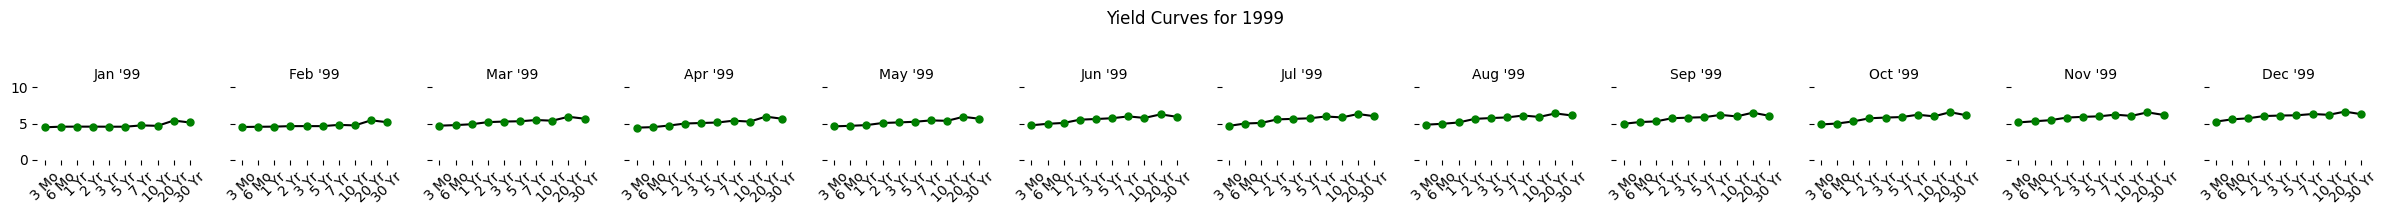

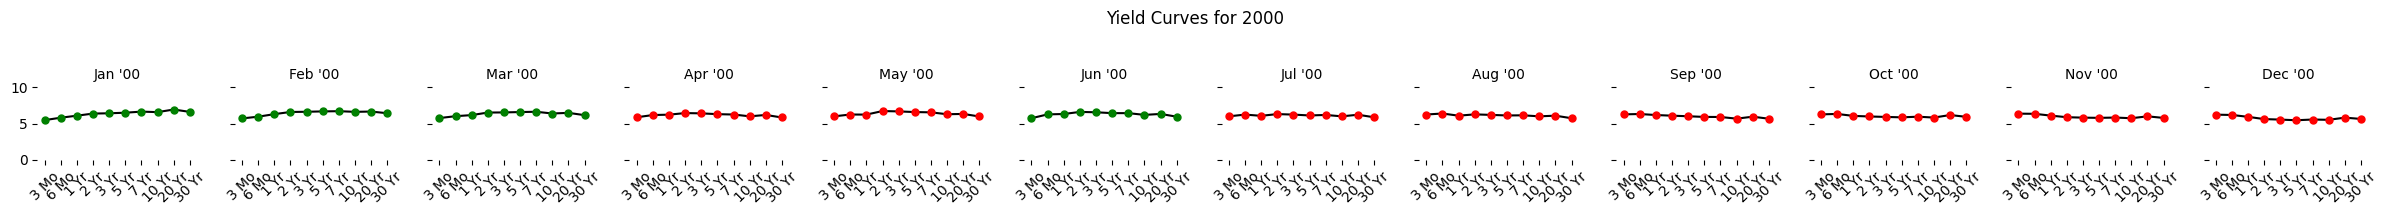

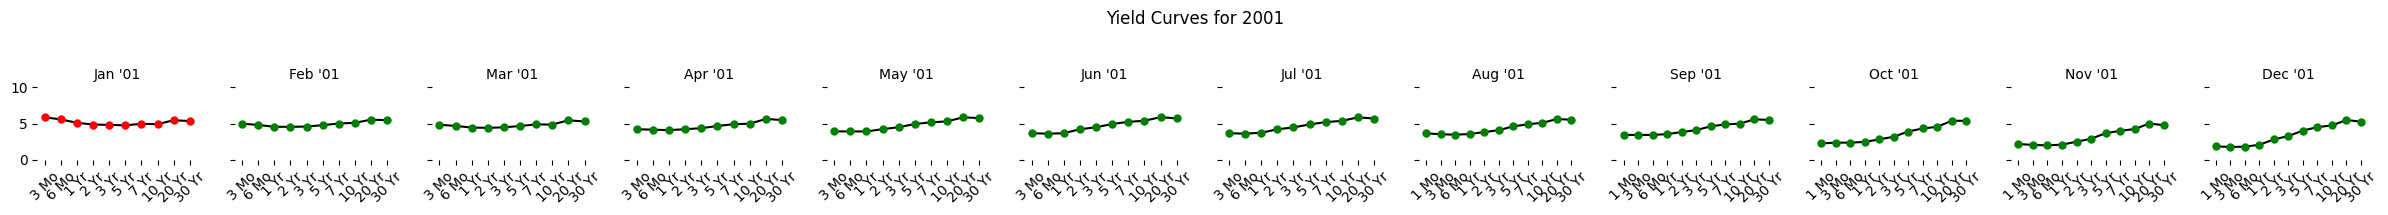

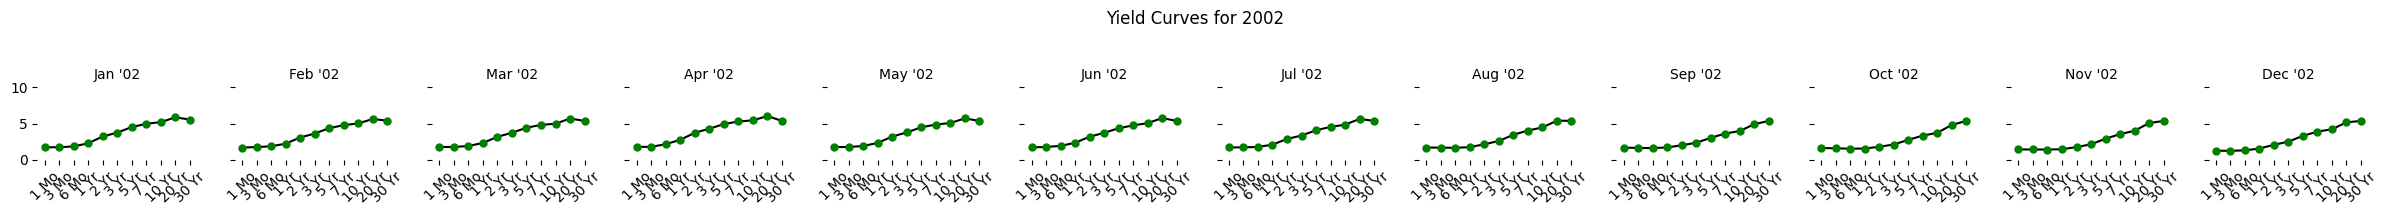

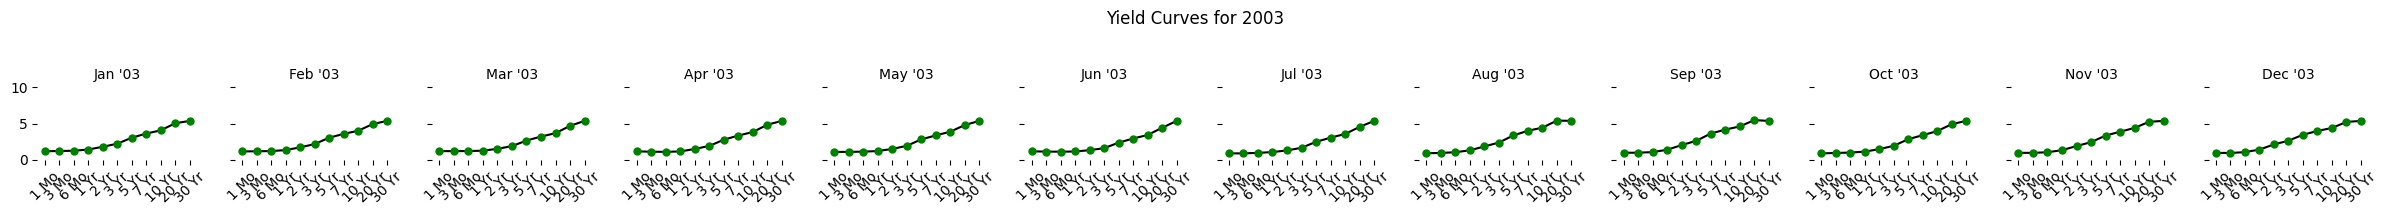

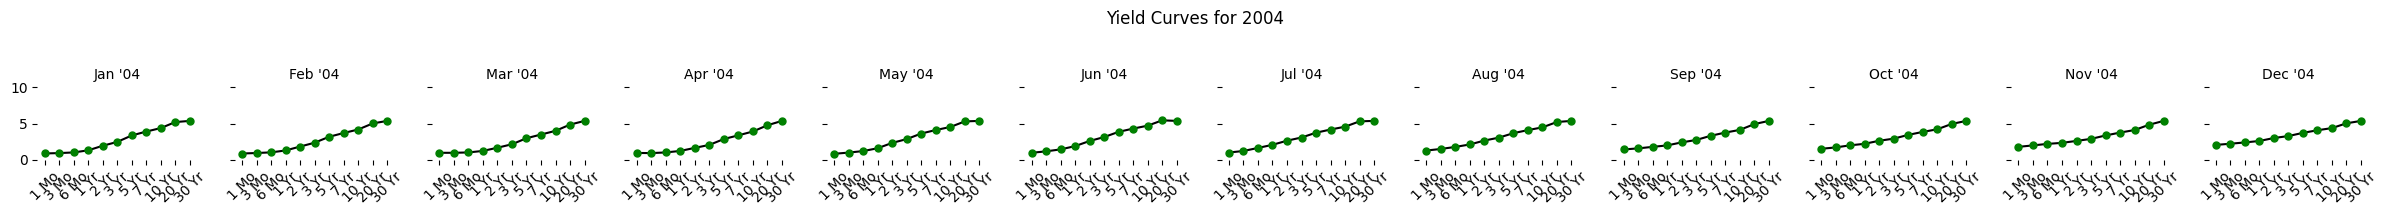

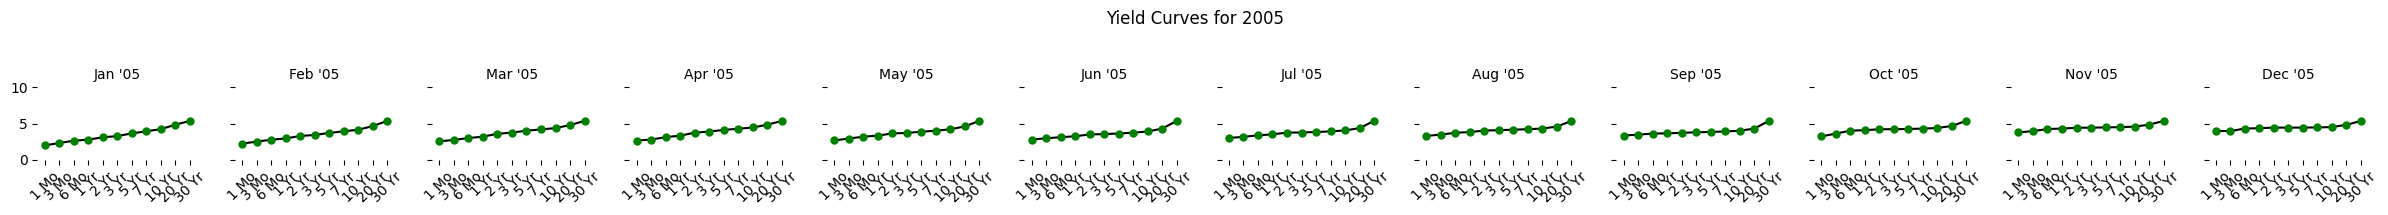

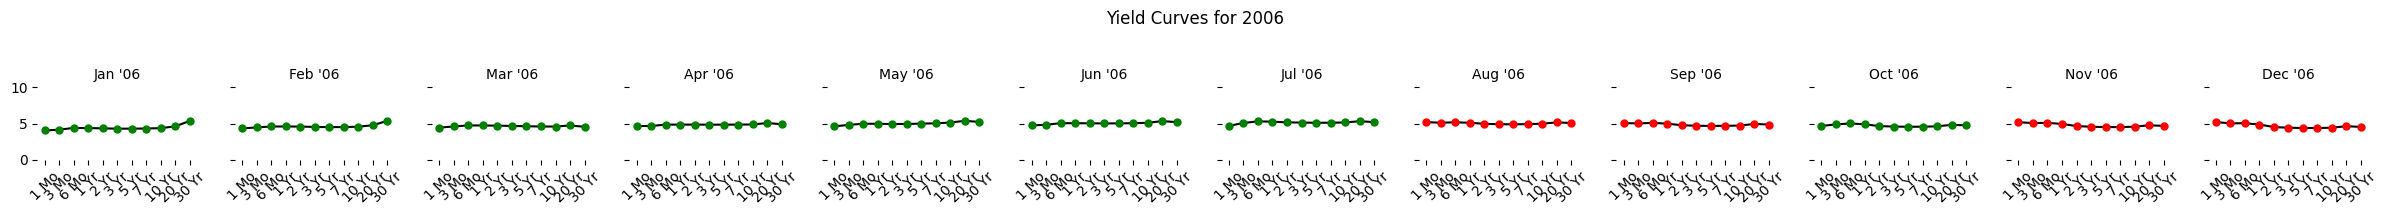

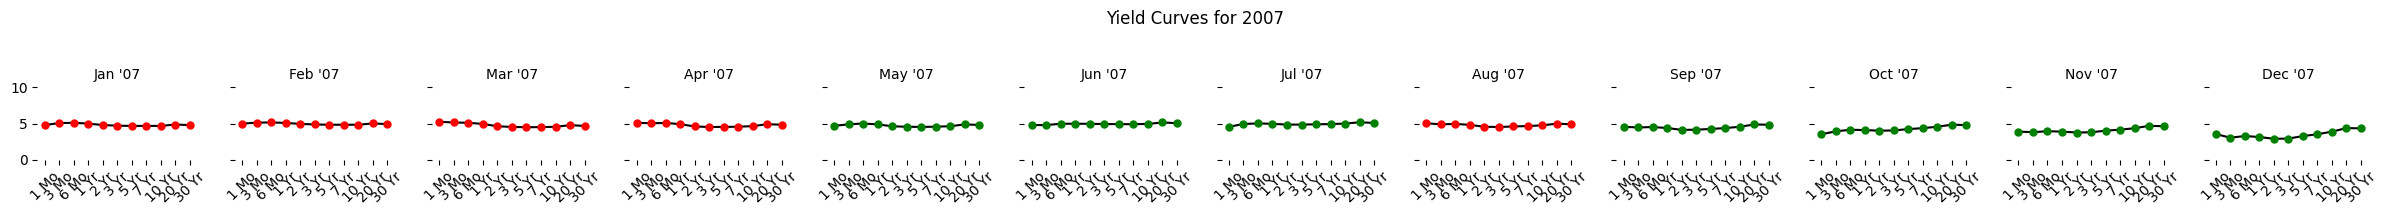

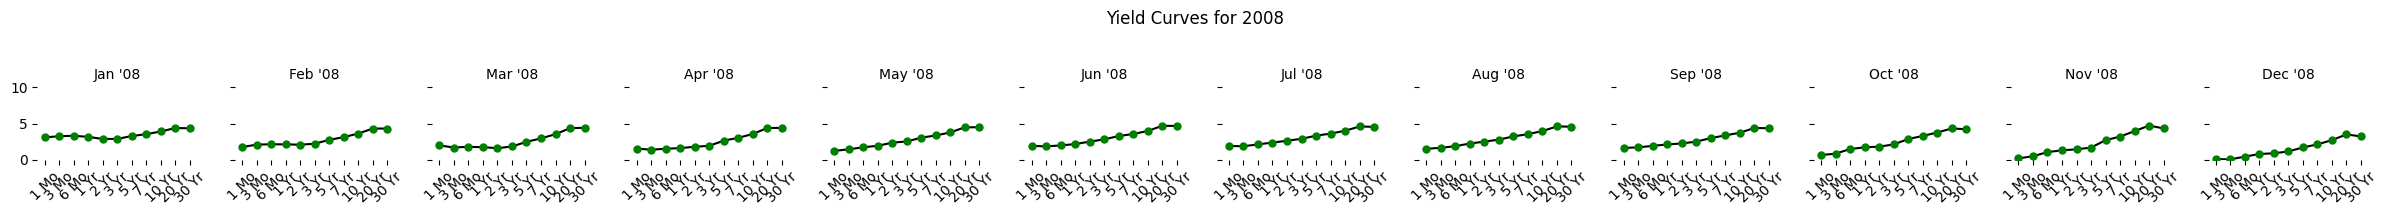

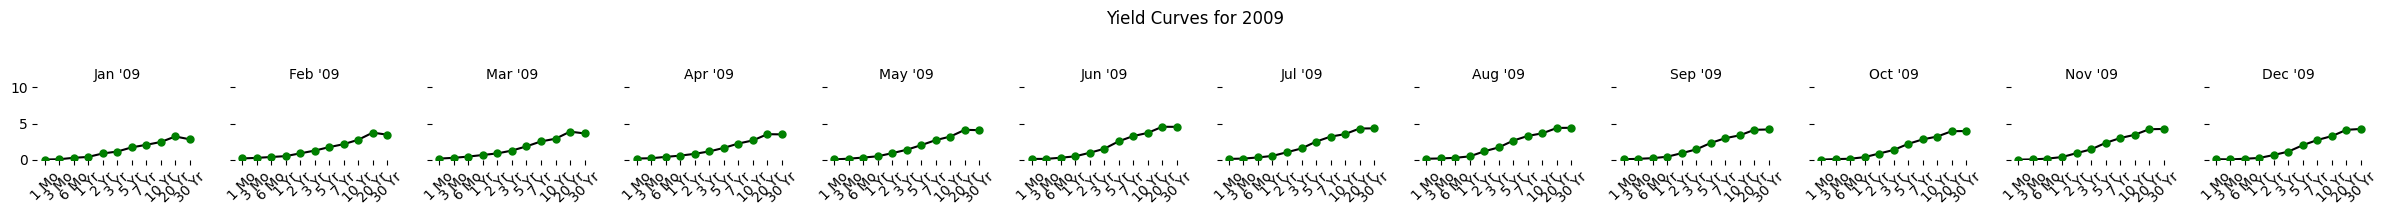

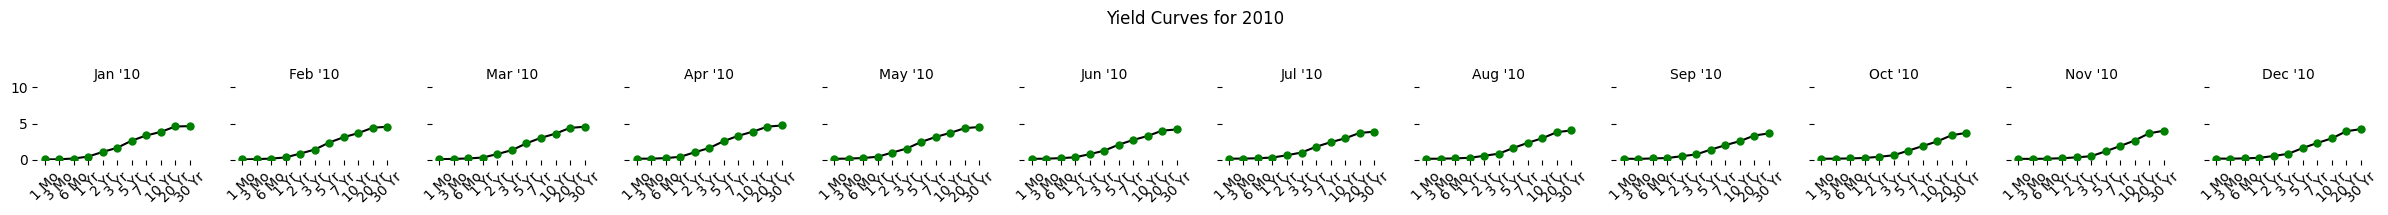

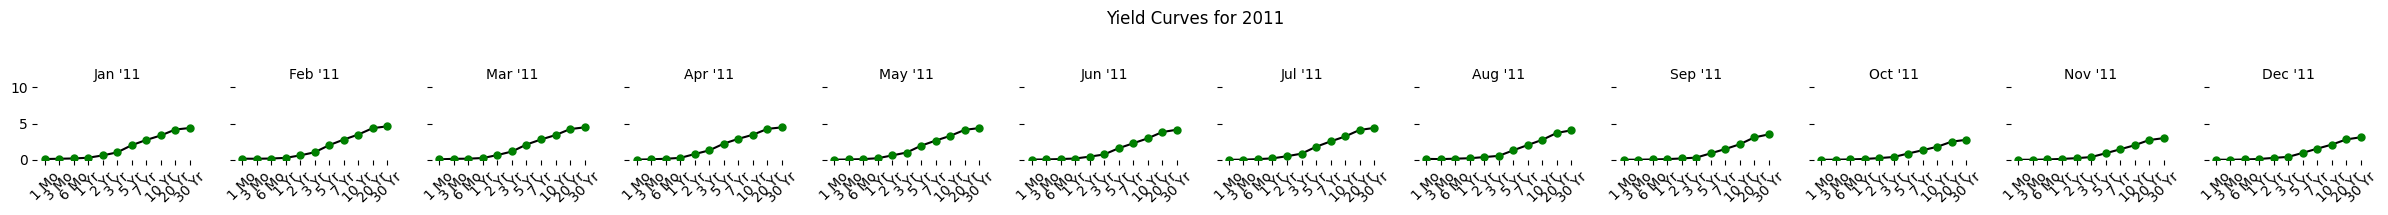

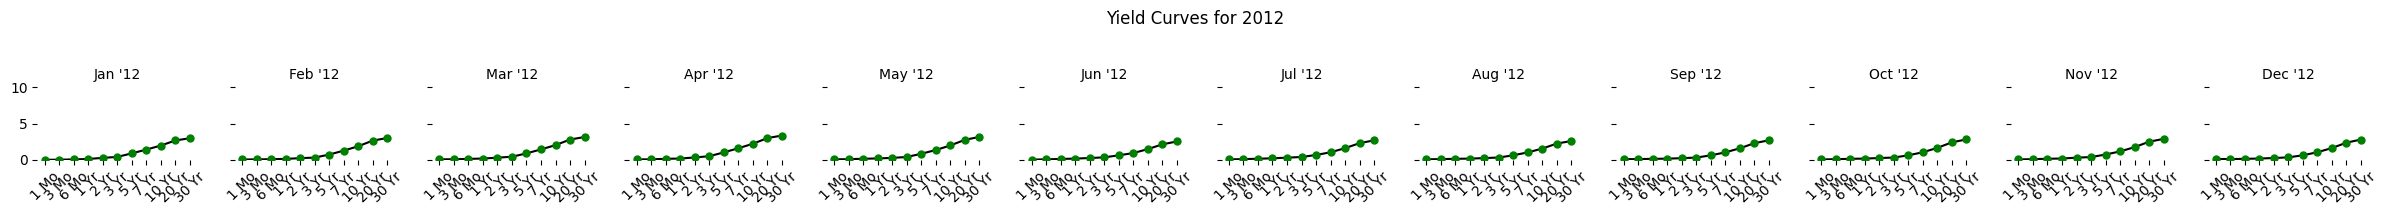

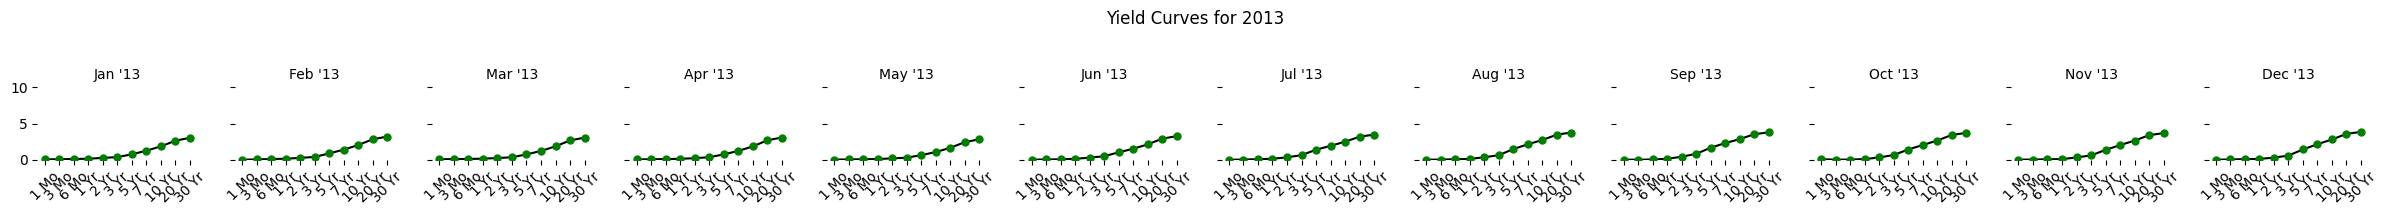

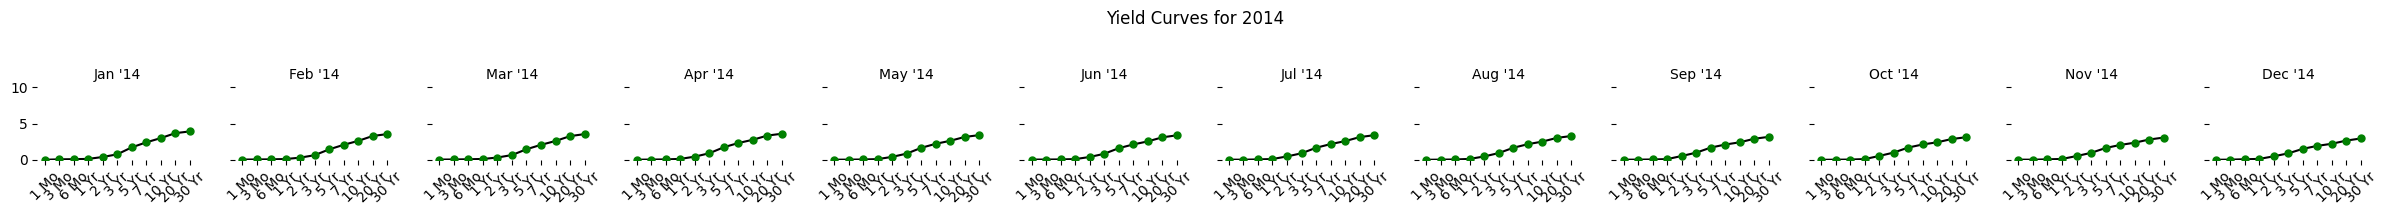

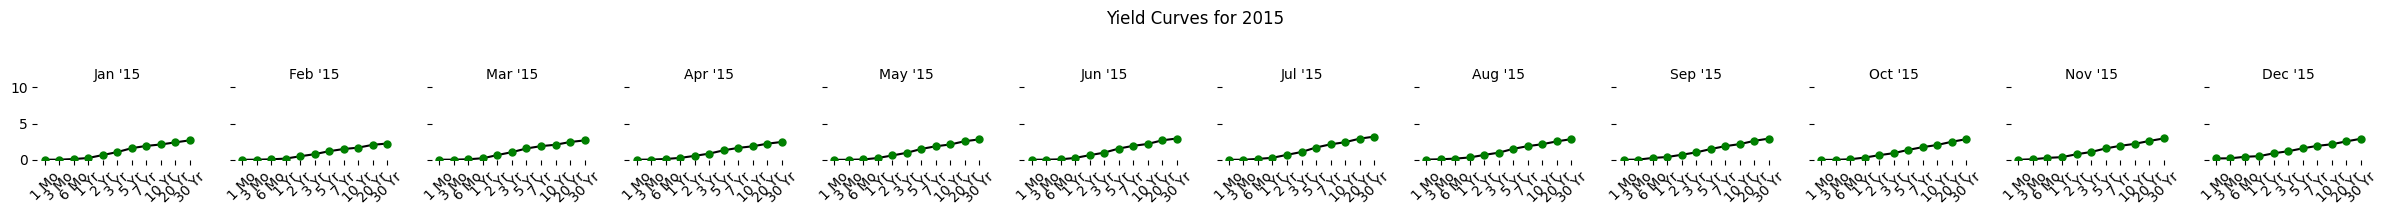

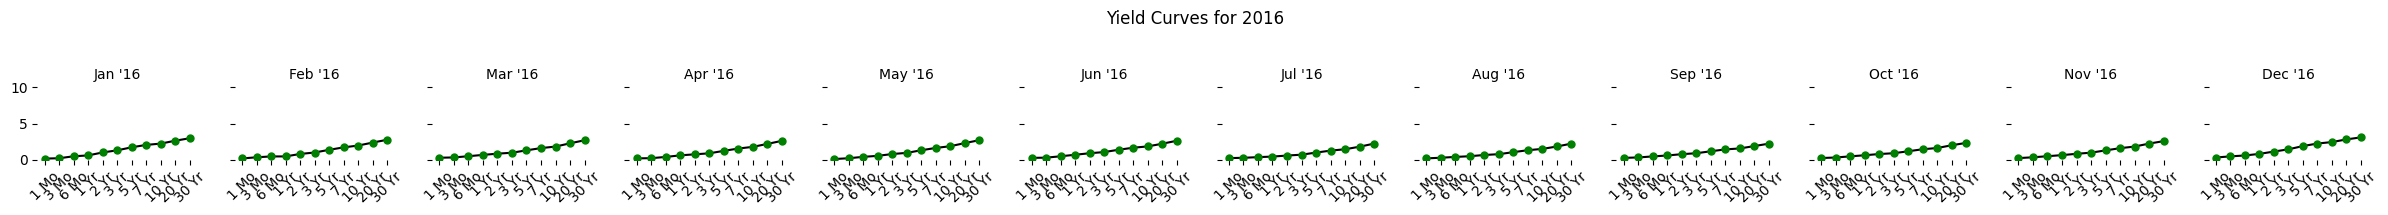

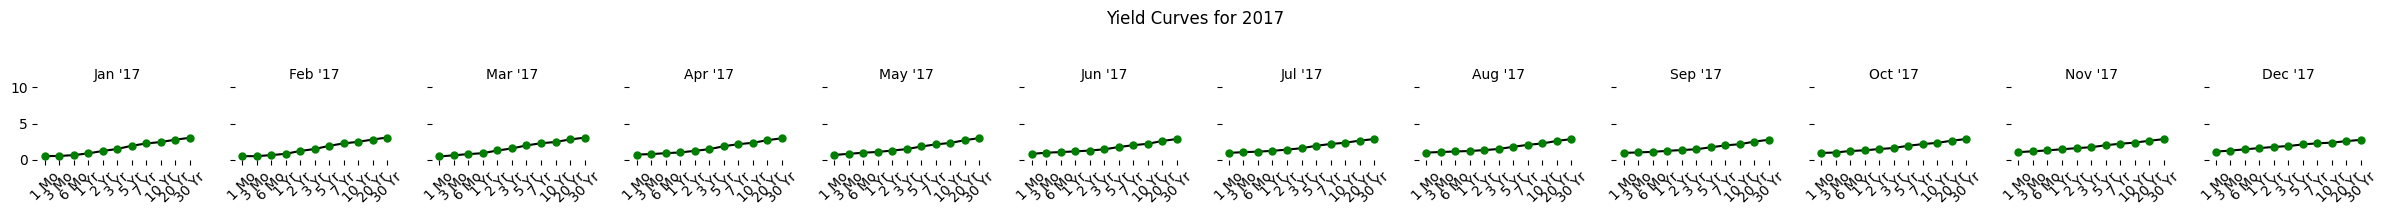

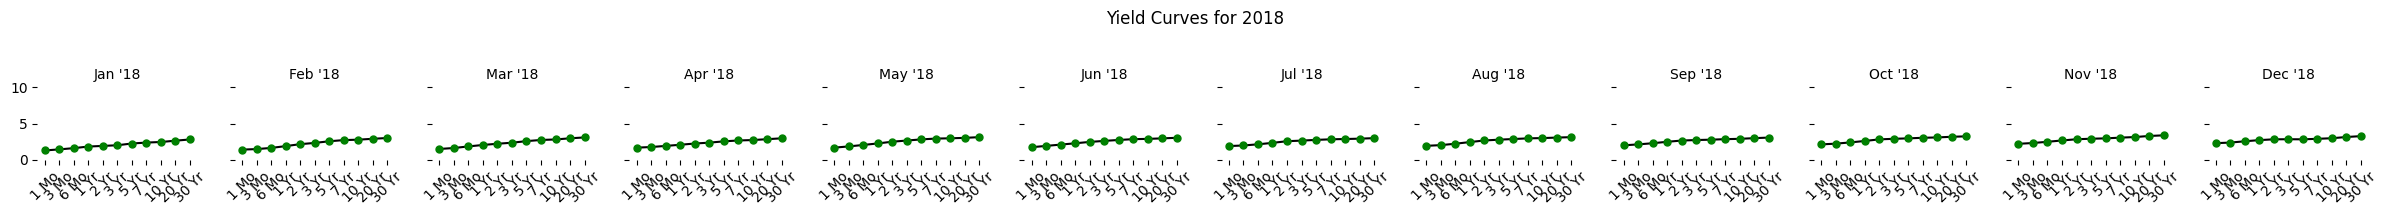

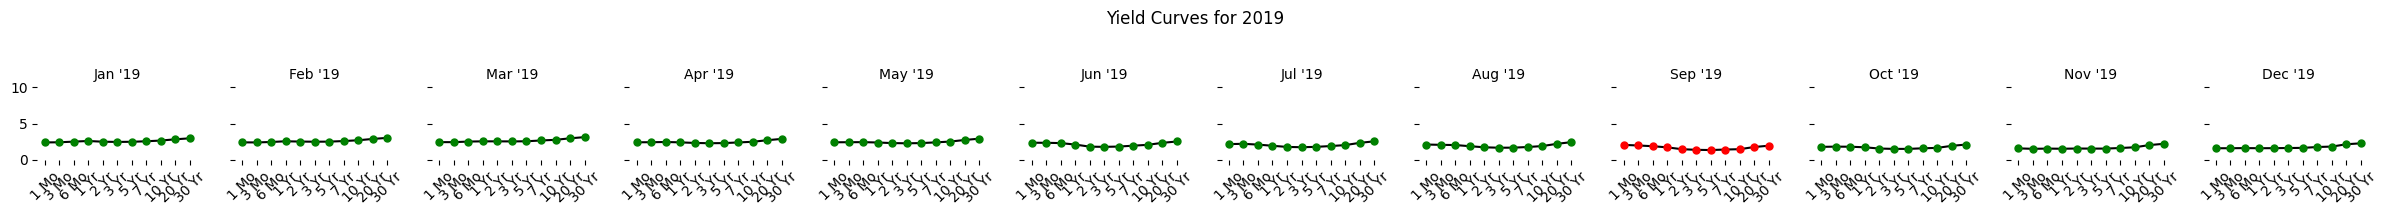

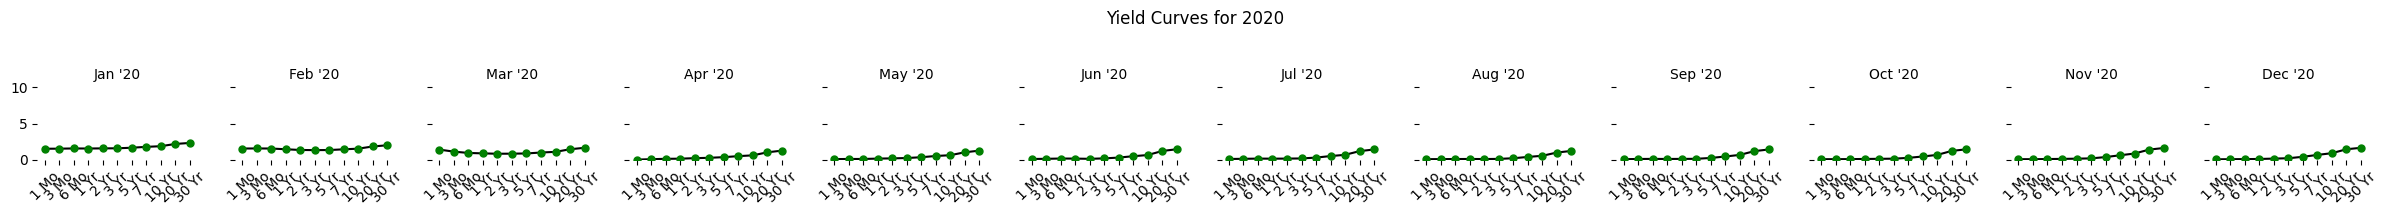

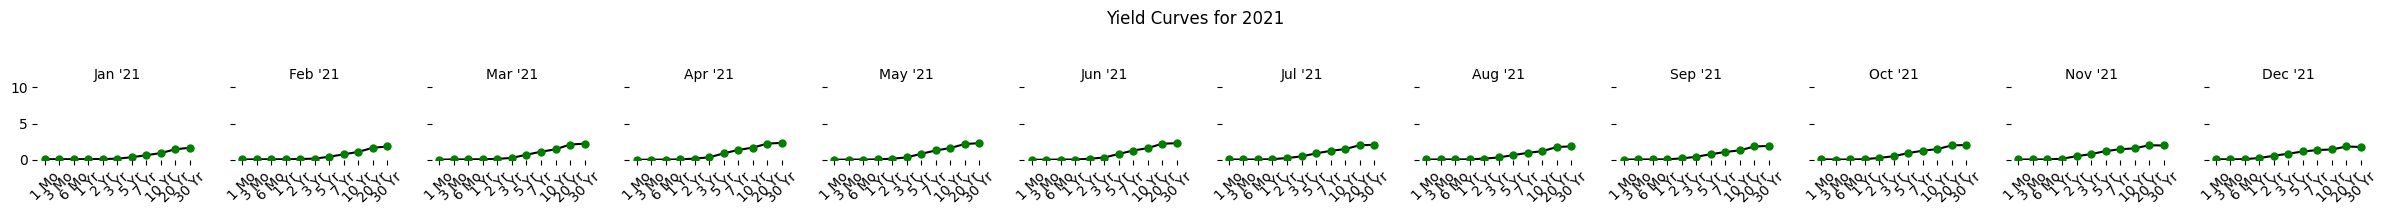

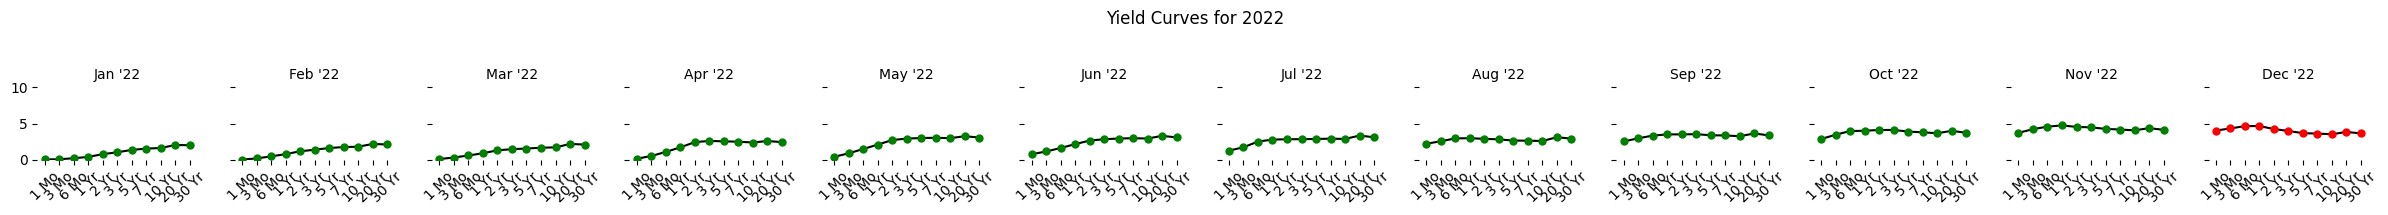

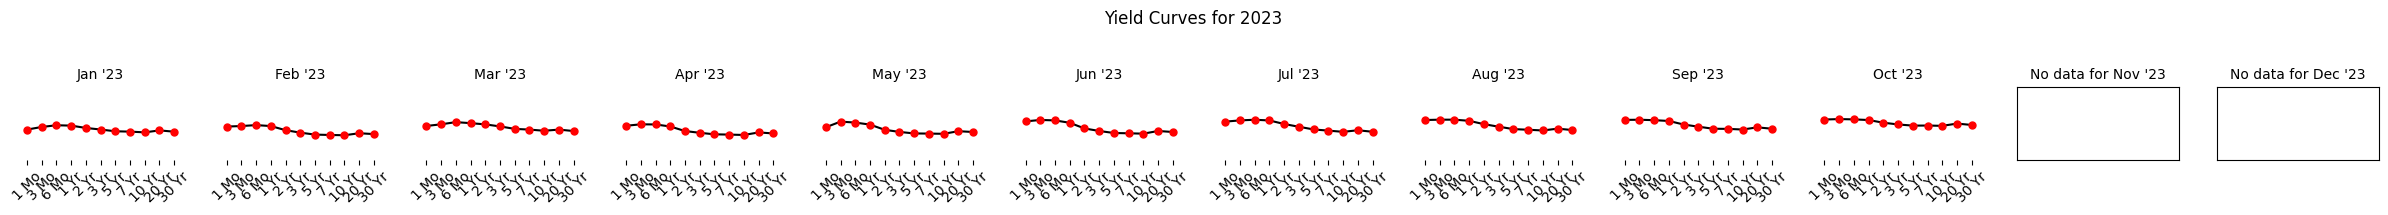

In [76]:
# Modified plot_yield_curves function to eliminate the warning
def plot_yield_curves_no_warning(year, yield_data):
    # Filter data for the specified year
    yearly_data = yield_data[yield_data['Year'] == year]

    if yearly_data.empty:
        print(f"No data available for the year {year}.")
        return

    # Create a 1x12 subplot for each month
    fig, axs = plt.subplots(1, 12, figsize=(24, 2), sharey=True)
    fig.suptitle(f'Yield Curves for {year}', y=1.05)

    # Iterate through each month
    for month in range(1, 13):
        ax = axs[month - 1]
        monthly_data = yearly_data[yearly_data['Month'] == month]

        if monthly_data.empty:
            ax.set_title(f"No data for {calendar.month_abbr[month]} '{str(year)[2:]}", fontsize=10)
            ax.set_xticks([])
            ax.set_yticks([])
            continue

        row = monthly_data.iloc[0]
        maturities = ['1 Mo', '3 Mo', '6 Mo', '1 Yr', '2 Yr', '3 Yr', '5 Yr', '7 Yr', '10 Yr', '20 Yr', '30 Yr']
        yields = row[maturities].values
        maturities = [m for m, y in zip(maturities, yields) if not np.isnan(y)]
        yields = [y for y in yields if not np.isnan(y)]

        # Determine the color based on the comparison between 1 Mo and 30 Yr yields
        color = 'green' if yields[0] < yields[-1] else 'red'

        # Plot the yield curve
        ax.plot(maturities, yields, color='black')  # base curve in black
        ax.plot(maturities, yields, 'o', markersize=5, color=color)  # individual points colored according to the rule

        # Set title and x-axis labels
        month_name = calendar.month_abbr[month]
        ax.set_title(f"{month_name} '{str(year)[2:]}", fontsize=10)
        ax.set_xticks(range(len(maturities)))  # Set x ticks
        ax.set_xticklabels(maturities, rotation=45)  # Set x tick labels
        ax.set_ylim(0, 10)

        # Remove spines and grid
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['bottom'].set_visible(False)
        ax.spines['left'].set_visible(False)
        ax.grid(False)

    plt.tight_layout()
    plt.show()

# Test the modified function with the yield data for multiple years without warnings
for i in range(1990, 2024):
    plot_yield_curves_no_warning(i, monthly_first_entry)
